In [1]:
import numpy as np
import pandas as pd
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt

# Load files

In [2]:
adwords = pd.read_csv("adwords.csv", index_col=0, parse_dates=True)
analytics = pd.read_csv("analytics.csv", index_col=0, parse_dates=True)
submitions = pd.concat([
    pd.read_csv("submitions.csv", parse_dates=[0], infer_datetime_format=True, dayfirst=True),
    pd.read_csv("submitions2.csv", parse_dates=[0], infer_datetime_format=True)
]).sort_values('Date').reset_index(drop=True)

In [3]:
adwords.sample(10)

,Impressions,Clicks
Day,,
2016-02-11,73579,591
2016-02-19,70953,609
2016-05-29,56846,609
2015-04-13,40279,409
2015-10-19,58229,503
2017-08-29,29580,993
2015-07-03,41243,454
2016-04-18,63368,657
2016-01-19,70844,598


In [4]:
analytics.sample(10)

,Pageviews
Day Index,
2017-03-14,9901
2017-10-06,825
2018-04-16,350
2018-01-03,1458
2017-11-18,1199
2017-10-25,1513
2017-01-16,1592
2016-12-22,1899
2017-01-23,1612


In [5]:
submitions.head(10)

,Date
0,2014-08-08 09:20:26
1,2014-08-15 11:06:17
2,2014-08-19 11:03:01
3,2014-08-19 11:03:22
4,2014-08-21 23:44:26
5,2014-09-03 08:42:22
6,2014-09-03 15:27:07
7,2014-09-10 12:25:32
8,2014-09-11 12:55:44
9,2014-09-13 18:14:16


# Create new features

In [6]:
#submitions['Date'] = submitions['Date'] \
#    .str.slice(0, 10) \
#    .str.rstrip()

#submitions.index = pd.to_datetime(submitions['Date'], format='%d/%m/%Y')

submitions['day'] = submitions['Date'].dt.strftime('%d/%m/%Y')

submitions['month_year'] = submitions['Date'].dt.strftime('01/%m/%Y')

submitions['week_number'] = submitions['Date'].dt.strftime('%Y-%W-1') \
    .apply(lambda x: pd.Timestamp.strptime(x, '%Y-%W-%w'))

In [73]:
def explore(df):
    population = df[df.index <= '2018-02-09']
    sample = df[df.index > '2018-02-09']

    fig, ax1 = plt.subplots(figsize=(15, 7))
    ax1.plot(population, label = "Adwords habilitado")
    ax1.plot(sample, label = "Adwords deshabilitado")
    plt.title("Inscripciones")
    plt.xlabel("Fecha")
    plt.ylabel("Cantidad de inscriptos")
    plt.legend()
    plt.show()

    fig, ax1 = plt.subplots(figsize=(15, 7))
    ax1.hist(population.values, label = "Adwords habilitado")
    ax1.hist(sample.values, label = "Adwords deshabilitado")

    ax1.axvline(population.values.mean(), color='b', linestyle='dashed', linewidth=2)
    ax1.axvline(sample.values.mean(), color='orange', linestyle='dashed', linewidth=2)
    ax1.text(population.values.mean() + .1, 30, "Media: %.2f" % population.values.mean())
    ax1.text(population.values.mean() + .1, 28, "Varianza: %.2f" % population.values.var())
    ax1.text(population.values.mean() + .1, 26, "Desvio estandar: %.2f" % population.values.std())
    ax1.text(sample.values.mean() + .1, 30, "Media: %.2f" % sample.values.mean())

    plt.title("Inscripciones")
    plt.xlabel("Cantidad de inscriptos")
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.show()

    zscore, pvalue = ztest(population, sample)

    print("Population size: %d" % len(population))
    print("Population mean: %.2f" % population.mean())
    print("Sample size: %d" % len(sample))
    print("Sample mean: %.2f" % sample.mean())

    print("Z score: %.2f" % zscore)
    print("P value: %.2f" % pvalue)

## Aggregated by day

In [65]:
submitions2 = submitions.groupby('day').agg({'day':len})
submitions2.index = pd.to_datetime(submitions2.index, format='%d/%m/%Y')
submitions2.sort_index(inplace=True)

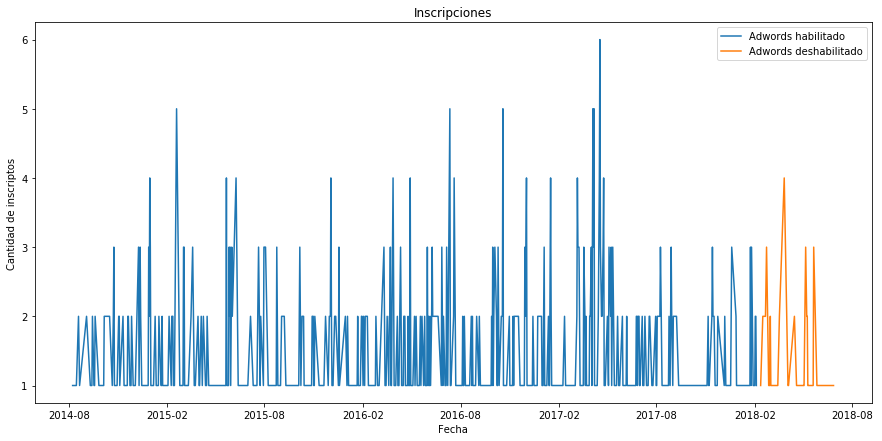

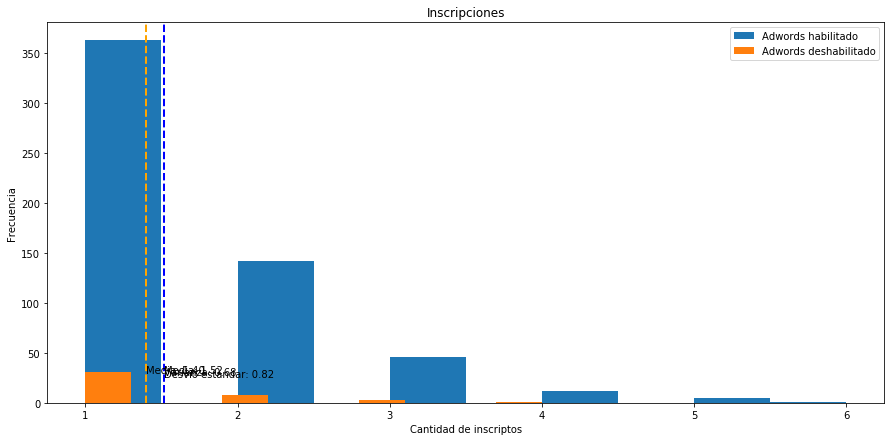

Population size: 569
Population mean: 1.52
Sample size: 43
Sample mean: 1.40
Z score: 0.95
P value: 0.34


In [66]:
explore(submitions2)

## Aggregated by month

In [67]:
submitions3 = submitions.groupby('month_year').agg({'month_year':len})
submitions3.index = pd.to_datetime(submitions3.index, format='%d/%m/%Y')
submitions3.sort_index(inplace=True)

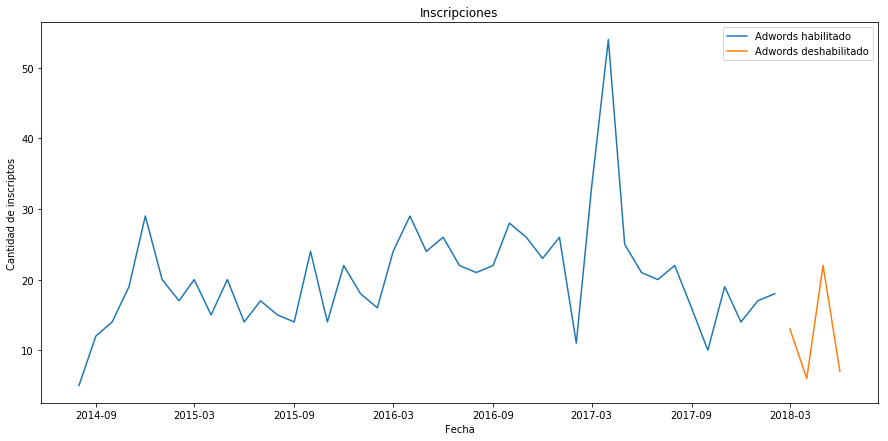

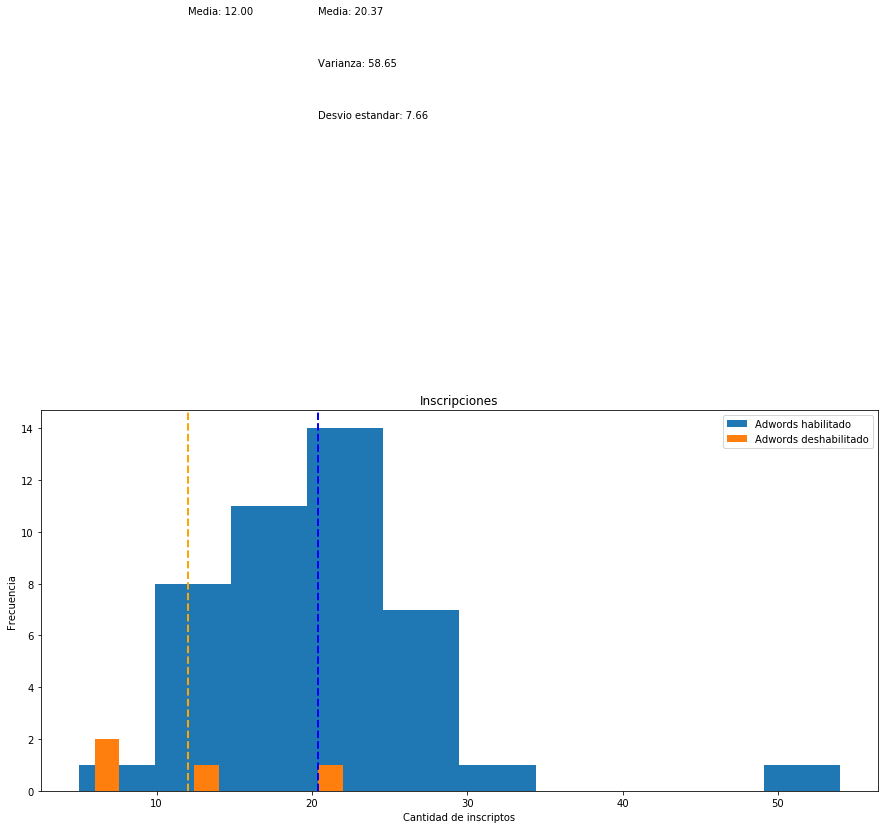

Population size: 43
Population mean: 20.37
Sample size: 4
Sample mean: 12.00
Z score: 2.07
P value: 0.04


In [68]:
explore(submitions3)

## Aggregated by week

In [69]:
submitions4 = submitions.groupby('week_number').agg({'week_number':len})
submitions4.sort_index(inplace=True)

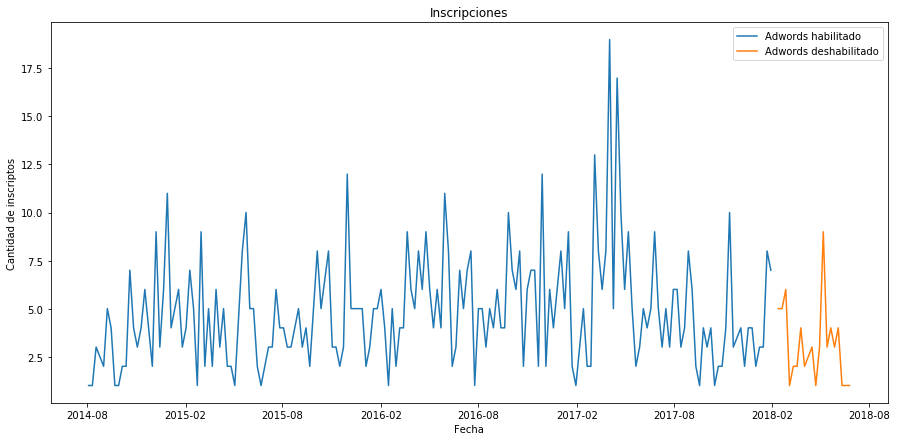

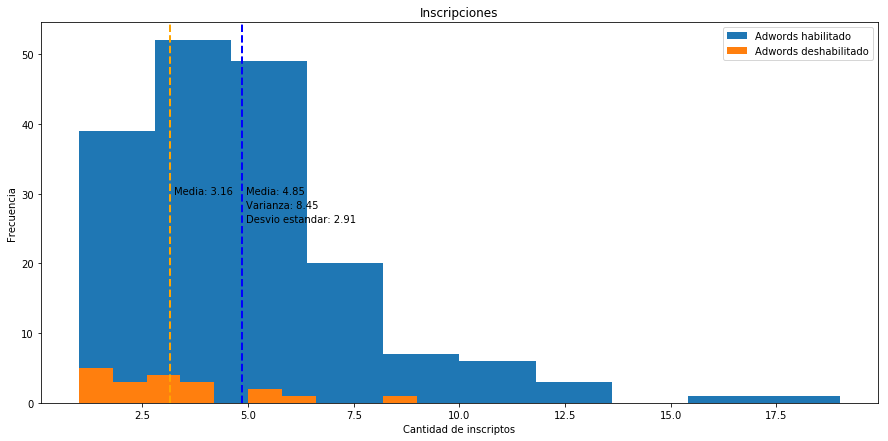

Population size: 178
Population mean: 4.85
Sample size: 19
Sample mean: 3.16
Z score: 2.47
P value: 0.01


In [74]:
explore(submitions4)

# Google Analytics review

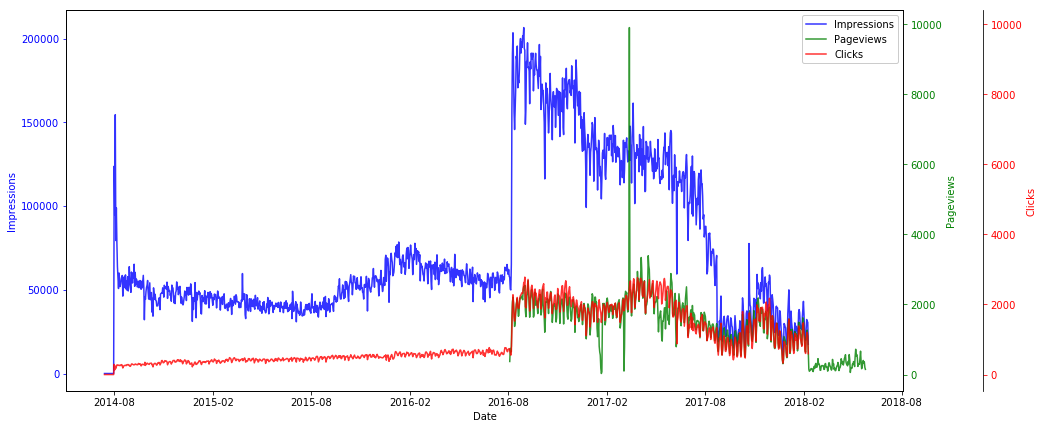

In [14]:
fig, ax1 = plt.subplots(figsize=(15, 7))
ax1.plot(adwords['Impressions'], 'b', alpha=.8)
ax1.set_xlabel('Date')
ax1.set_ylabel('Impressions', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(analytics['Pageviews'], 'g', alpha=.8)
ax2.set_ylabel('Pageviews', color='g')
ax2.tick_params('y', colors='g')

ax3 = ax1.twinx()

ax3.plot(adwords['Clicks'], 'r', alpha=.8)
ax3.set_ylabel('Clicks', color='r')
ax3.spines['right'].set_position(('outward', 80))
ax3.set_ylim(ax2.get_ylim())
ax3.tick_params('y', colors='r')

# See https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend#answer-47370214
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()

fig.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc=1, framealpha=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()

In [15]:
mean = analytics['Pageviews'].mean()
std = analytics['Pageviews'].std()
analytics = analytics[(analytics['Pageviews'] > mean - 3 * std) & (analytics['Pageviews'] < mean + 3 * std)]

In [16]:
population = analytics[analytics.index <= '2018-02-09']['Pageviews']
sample = analytics[analytics.index > '2018-02-09']['Pageviews']

In [17]:
len(sample)

106

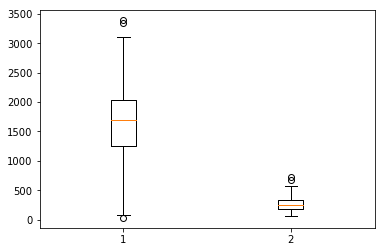

In [18]:
plt.boxplot([population, sample])
plt.show()

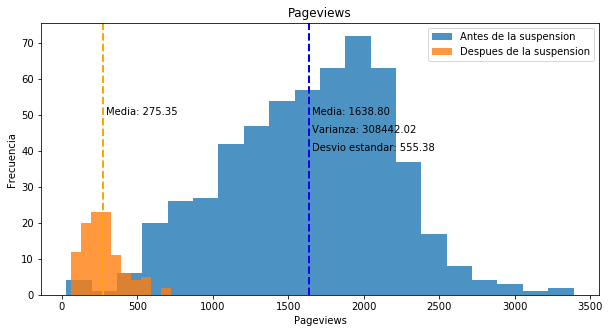

In [19]:
plt.figure(figsize=(10, 5))
plt.hist(population, label="Antes de la suspension", bins=20, alpha=.8)
plt.hist(sample, label="Despues de la suspension", alpha=.8)
plt.axvline(population.mean(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(sample.mean(), color='orange', linestyle='dashed', linewidth=2)
plt.text(population.mean() + 20, 50, "Media: %.2f" % population.mean())
plt.text(population.mean() + 20, 45, "Varianza: %.2f" % population.var())
plt.text(population.mean() + 20, 40, "Desvio estandar: %.2f" % population.std())
plt.text(sample.mean() + 20, 50, "Media: %.2f" % sample.mean())
plt.title("Pageviews")
plt.xlabel("Pageviews")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

In [20]:
print("Population mean: %.2f" % population.mean())
print("Population sample: %.2f" % sample.mean())

Population mean: 1638.80
Population sample: 275.35


In [28]:
ztest(population, sample)

(-25.128493917656581, 2.428693390855326e-139)